In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><img src="https://keras.io/img/logo-small.png" alt="Keras logo" width="100"><br/>
This starter notebook is provided by the Keras team.</center>

## Keras NLP starter guide here: https://keras.io/guides/keras_nlp/getting_started/

In this competition, the challenge is to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.
A dataset of 10,000 tweets that were hand classified is available.

__This starter notebook uses the [DistilBERT](https://arxiv.org/abs/1910.01108) pretrained model from KerasNLP.__


**BERT** stands for **Bidirectional Encoder Representations from Transformers**. BERT and other Transformer encoder architectures have been wildly successful on a variety of tasks in NLP (natural language processing). They compute vector-space representations of natural language that are suitable for use in deep learning models.

The BERT family of models uses the **Transformer encoder architecture** to process each token of input text in the full context of all tokens before and after, hence the name: Bidirectional Encoder Representations from Transformers.

BERT models are usually pre-trained on a large corpus of text, then fine-tuned for specific tasks.

**DistilBERT model** is a distilled form of the **BERT** model. The size of a BERT model was reduced by 40% via knowledge distillation during the pre-training phase while retaining 97% of its language understanding abilities and being 60% faster.



![BERT Architecture](https://www.cse.chalmers.se/~richajo/nlp2019/l5/bert_class.png)



In this notebook, you will:

- Load the Disaster Tweets
- Explore the dataset
- Preprocess the data
- Load a DistilBERT model from Keras NLP
- Train your own model, fine-tuning BERT
- Generate the submission file


In [ ]:
'''

https://keras.io/api/models/
implement logistic model with keras - https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/
https://medium.com/@khang.pham.exxact/text-classification-with-bert-7afaacc5e49b
https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

'''

'\n\nhttps://keras.io/api/models/\nimplement logistic model with keras - https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/\nhttps://medium.com/@khang.pham.exxact/text-classification-with-bert-7afaacc5e49b\nhttps://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert\n\n'

In [2]:
!pip install keras-core --upgrade
!pip install -q keras-nlp --upgrade

# This sample uses Keras Core, the multi-backend version of Keras.
# The selected backend is TensorFlow (other supported backends are 'jax' and 'torch')
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.8/571.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 20.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.2 which is incompatibl

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

os.environ['KERAS_BACKEND'] = 'tensorflow'

pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2

Using TensorFlow backend
TensorFlow version: 2.16.2
KerasNLP version: 0.14.0


In [4]:
root_path = "/content/drive/MyDrive/Colab Notebooks/disaster_truth_analysis"
data_path = root_path + "/data"

sys.path.append(root_path)

# Load the Disaster Tweets
Let's have a look at the train and test dataset.

They contain:
- id
- keyword: A keyword from that tweet (although this may be blank!)
- location: The location the tweet was sent from (may also be blank)
- text: The text of a tweet
- target: 1 if the tweet is a real disaster or 0 if not

In [5]:

df_train = pd.read_csv(data_path + "/train.csv")
df_test = pd.read_csv(data_path + "/test.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

display(df_train.head())
display(df_test.head())

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Explore the dataset

In [6]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


If you want to know more information about the data, you can grab useful information [here](https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert)

Note that all the tweets are in english.

# Preprocess the data

In [8]:
import common_code
df_train, df_test = common_code.clean_text_wrapper(df_train, df_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Start cleaning...
done!


## Solution 1: use Logistic Regression

In [9]:
MAX_FEATURES = 10000
NGRAMS_RANGE = (1, 2)

text_train, text_test = common_code.encode_doc(MAX_FEATURES, NGRAMS_RANGE, df_train['cleaned_text'], df_test['cleaned_text'])

text_train.shape: (7613, 10000)
The first 100 tokens: ['aa' 'aba' 'aba woman' 'abandon' 'abandoned' 'abandoned aircraft'
 'abbott' 'abbswinston' 'abbswinston zionist' 'abc' 'abc news' 'abcnews'
 'abcnews obama' 'abe' 'ability' 'ablaze' 'ablaze link' 'able'
 'abomination' 'abortion' 'absolutely' 'abstorm' 'abuse' 'abused' 'access'
 'access secondrets' 'accident' 'accident experts' 'accident https'
 'accident link' 'accident man' 'accident property' 'accidentally'
 'accidents' 'accidents indian' 'according' 'account' 'account hiroshima'
 'accused' 'accuses' 'accuses nema' 'acid' 'acres' 'acres link' 'across'
 'act' 'act link' 'acting' 'action' 'action hostages' 'actions'
 'actions year' 'activated' 'activates' 'activates municipal' 'active'
 'active exploit' 'activity' 'acts' 'actual' 'actually' 'acute' 'add'
 'added' 'added video' 'adding' 'address' 'admits' 'admits arson' 'adult'
 'advance' 'advance link' 'adventures' 'advisory' 'af' 'affected'
 'affected fatal' 'affecting' 'affects' '

In [10]:
from sklearn.model_selection import train_test_split

indices = np.arange(df_train.shape[0])
X_train, X_veri, y_train, y_veri, indices_train, indices_veri = train_test_split(
    text_train, df_train["target"], indices, test_size=0.1, random_state=42)

X_test = text_test

display(X_train.shape)
display(X_veri.shape)
display(X_test.shape)

(6851, 10000)

(762, 10000)

(3263, 10000)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

SOLVER = 'liblinear' #"saga"
C_VALUE = 0.95
log_model = LogisticRegression(C=C_VALUE, solver=SOLVER, max_iter=1000)
log_model.fit(X_train, y_train)
y_veri_pred = log_model.predict(X_veri)

print("accuracy:", metrics.accuracy_score(y_veri, y_veri_pred))
print("recall:", metrics.recall_score(y_veri, y_veri_pred))
print("F1 score:", round(metrics.f1_score(y_veri, y_veri_pred), 6))

accuracy: 0.7742782152230971
recall: 0.6488095238095238
F1 score: 0.717105


# Soluton 2: Transfer training the DistilBERT model

In [ ]:
BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.9
VAL_SPLIT = 0.1
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE

EPOCHS = 5
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
from sklearn.model_selection import train_test_split

# we ignore the location and keyword, since they are not helpful in deciding the truthness of the info.
X = df_train["cleaned_text"]
y = df_train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["cleaned_text"]

### Load a DistilBERT model from Keras NLP

Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT.

The BertClassifier model can be configured with a preprocessor layer, in which case it will automatically apply preprocessing to raw inputs during fit(), predict(), and evaluate(). This is done by default when creating the model with from_preset().

We will choose DistilBERT model.that learns a distilled (approximate) version of BERT, retaining 97% performance but using only half the number of parameters ([paper](https://arxiv.org/abs/1910.01108)).

It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

Specifically, it doesn't have token-type embeddings, pooler and retains only half of the layers from Google's BERT.

In [ ]:
# Load a DistilBERT model.
preset= "distil_bert_base_en_uncased"

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=160,
                                                                   name="preprocessor_4_tweets"
                                                                  )

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor,
                                                               num_classes=2)

classifier.summary()

100%|██████████| 580/580 [00:00<00:00, 362kB/s]
100%|██████████| 226k/226k [00:00<00:00, 673kB/s]
100%|██████████| 515/515 [00:00<00:00, 357kB/s]
100%|██████████| 253M/253M [00:09<00:00, 26.8MB/s]


Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

### Train your own model, fine-tuning BERT

In [ ]:
# Compile

classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #'binary_crossentropy',
    optimizer= "adam",
    metrics= ["accuracy"]
)
classifier.backbone.trainable = False

# Fit
history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 150s 435ms/step - accuracy: 0.7266 - loss: 0.5368 - val_accuracy: 0.7808 - val_loss: 0.4539
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 68s 318ms/step - accuracy: 0.8001 - loss: 0.4543 - val_accuracy: 0.7953 - val_loss: 0.4522
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 176ms/step - accuracy: 0.8001 - loss: 0.4496 - val_accuracy: 0.7940 - val_loss: 0.4390
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 173ms/step - accuracy: 0.8009 - loss: 0.4355 - val_accuracy: 0.7992 - val_loss: 0.4365
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - accuracy: 0.8022 - loss: 0.4384 - val_accuracy: 0.8018 - val_loss: 0.4402


In [ ]:
# Fit
history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=5,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.8043 - loss: 0.4348 - val_accuracy: 0.7953 - val_loss: 0.4296
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 46s 215ms/step - accuracy: 0.8042 - loss: 0.4386 - val_accuracy: 0.8045 - val_loss: 0.4314
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.8078 - loss: 0.4311 - val_accuracy: 0.7992 - val_loss: 0.4293
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 171ms/step - accuracy: 0.8007 - loss: 0.4277 - val_accuracy: 0.8084 - val_loss: 0.4316
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - accuracy: 0.8133 - loss: 0.4232 - val_accuracy: 0.8136 - val_loss: 0.4284


In [ ]:
# Fit
history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=5,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/step - accuracy: 0.8144 - loss: 0.4175 - val_accuracy: 0.8110 - val_loss: 0.4262
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.8190 - loss: 0.4101 - val_accuracy: 0.8058 - val_loss: 0.4269
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 182ms/step - accuracy: 0.8170 - loss: 0.4202 - val_accuracy: 0.8123 - val_loss: 0.4318
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.8163 - loss: 0.4152 - val_accuracy: 0.7979 - val_loss: 0.4311
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.8176 - loss: 0.4086 - val_accuracy: 0.8031 - val_loss: 0.4321


In [ ]:
classifier.save(root_path + "/distilBERT_transfer.keras")

In [ ]:
y_test_logit = classifier.predict(x = X_test)
y_test = np.argmax(y_test_logit, axis = -1)
df_test['target'] = y_test

df_test.to_csv(data_path + "/claudia_submit_bert.csv", columns=['id','target'], index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step


# Solution 3: use Tiny BertClassifier
Use a tiny Bert classifier, but it seems the effect is not good. After decades of training, accuracy is not as good as the above LogisticRegression or DistilBert

In [ ]:
classifier_bert_mini = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased", num_classes=2
)
classifier_bert_mini.summary()


100%|██████████| 507/507 [00:00<00:00, 343kB/s]
100%|██████████| 16.8M/16.8M [00:01<00:00, 15.2MB/s]
100%|██████████| 547/547 [00:00<00:00, 463kB/s]
100%|██████████| 226k/226k [00:00<00:00, 686kB/s]


Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,178 (16.73 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_tiny_en_uncased",
    sequence_length=160,
)

In [ ]:
# Pretrained classifier.
bert_tiny_classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased", preprocessor=preprocessor,
    num_classes=2,
)

bert_tiny_classifier.backbone.trainable = False

bert_tiny_classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=5,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 62s 170ms/step - loss: 0.6861 - sparse_categorical_accuracy: 0.5452 - val_loss: 0.6748 - val_sparse_categorical_accuracy: 0.5591
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - loss: 0.6678 - sparse_categorical_accuracy: 0.5809 - val_loss: 0.6628 - val_sparse_categorical_accuracy: 0.5696
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - loss: 0.6567 - sparse_categorical_accuracy: 0.6002 - val_loss: 0.6529 - val_sparse_categorical_accuracy: 0.6115
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6475 - sparse_categorical_accuracy: 0.6270 - val_loss: 0.6442 - val_sparse_categorical_accuracy: 0.6470
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6381 - sparse_categorical_accuracy: 0.6484 - val_loss: 0.6366 - val_sparse_categorical_accuracy: 0.6785


In [ ]:
bert_tiny_classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=10,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6290 - sparse_categorical_accuracy: 0.6688 - val_loss: 0.6302 - val_sparse_categorical_accuracy: 0.6916
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6258 - sparse_categorical_accuracy: 0.6771 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.7021
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6219 - sparse_categorical_accuracy: 0.6762 - val_loss: 0.6192 - val_sparse_categorical_accuracy: 0.7047
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6169 - sparse_categorical_accuracy: 0.6881 - val_loss: 0.6148 - val_sparse_categorical_accuracy: 0.7100
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6127 - sparse_categorical_accuracy: 0.6943 - val_loss: 0.6106 - val_sparse_categorical_accuracy: 0.7087
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6071 - sparse_categorical_accuracy: 0.6968 - val_loss: 0.6070 - val_sparse_categorical_accuracy: 0.711

In [ ]:
bert_tiny_classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=20,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5959 - sparse_categorical_accuracy: 0.7034 - val_loss: 0.5929 - val_sparse_categorical_accuracy: 0.7218
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5888 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.5904 - val_sparse_categorical_accuracy: 0.7257
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.5897 - sparse_categorical_accuracy: 0.7034 - val_loss: 0.5883 - val_sparse_categorical_accuracy: 0.7323
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5861 - sparse_categorical_accuracy: 0.7140 - val_loss: 0.5863 - val_sparse_categorical_accuracy: 0.7297
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.5804 - sparse_categorical_accuracy: 0.7077 - val_loss: 0.5843 - val_sparse_categorical_accuracy: 0.7323
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5847 - sparse_categorical_accuracy: 0.7099 - val_loss: 0.5827 - val_sparse_categorical_accuracy: 0.737

In [ ]:
bert_tiny_classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=20,
                         validation_data=(X_val, y_val)
                        )

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5585 - sparse_categorical_accuracy: 0.7233 - val_loss: 0.5539 - val_sparse_categorical_accuracy: 0.7441
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5570 - sparse_categorical_accuracy: 0.7305 - val_loss: 0.5534 - val_sparse_categorical_accuracy: 0.7441
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.5530 - sparse_categorical_accuracy: 0.7299 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.7454
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.5598 - sparse_categorical_accuracy: 0.7263 - val_loss: 0.5525 - val_sparse_categorical_accuracy: 0.7441
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.5579 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.5521 - val_sparse_categorical_accuracy: 0.7454
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5512 - sparse_categorical_accuracy: 0.7297 - val_loss: 0.5518 - val_sparse_categorical_accuracy: 0.745

# Display ConfusionMatrix

In [12]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    # C: refer to this post for the purpose of .ravel() - https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

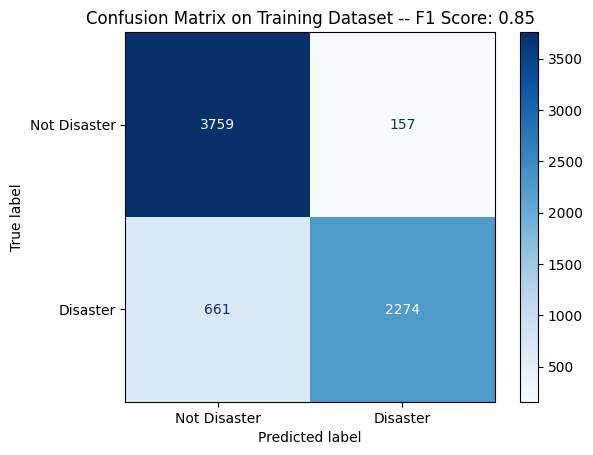

In [13]:
y_pred_train = log_model.predict(X_train).reshape((-1, 1))
displayConfusionMatrix(y_train, y_pred_train, "Training")


### Solution 2 - use DistilBert

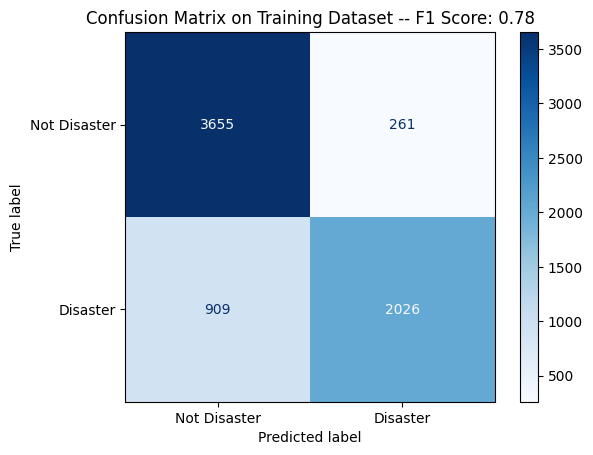

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
displayConfusionMatrix(y_train, y_pred_train, "Training")

### Solution 3: Use Mini BertClassifier

215/215 ━━━━━━━━━━━━━━━━━━━━ 59s 266ms/step


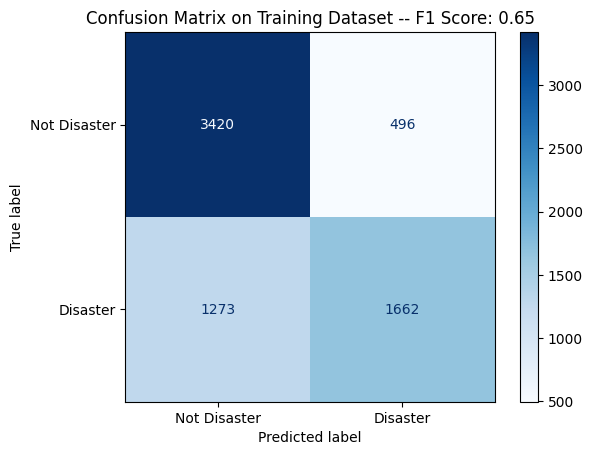

In [ ]:
y_pred_train = bert_tiny_classifier.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
displayConfusionMatrix(y_train, y_pred_train, "Training")